<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_dl.png">


<br><br><center><h1 style="font-size:2em;color:#2467C0"> Operaciones lógicas y máscaras </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/openCV.jpg" align="middle" style="width:550px;"/></td>
<td>

**OpenCV** es una biblioteca libre desarrollada originalmente por Intel. Vio la luz en el año 1999. Escrita originalmente en C/C++, su mejor virtud es que es multiplataforma, se puede ejecutar en diferentes sistemas operativos (Linux, Windows, Mac OS X, Android e iOS). También la podemos utilizar en diferentes lenguajes de programación como Java, Objective C, C# y *Python*.

Quizás sea la biblioteca de visión artificial más importante y más usada. Es utilizada por universidades, empresas y gente del movimiento Maker para dar rienda suelta a su imaginación al tratarse de un software libre.

En este notebook comenzaremos con el tratamiento de imágenes en Python mediante esta librería, más específicamente vamos a ver como cargar o  leer una imagen, conversión a blanco y negro, filtros y otras operaciones que serán útiles dentro del curso.


   
<br>
</td>
</tr>
</table>

# 0. Librerías básicas

In [1]:
#Librerías básicas de esta notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [4]:
def plt_imshow(title, image):
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

# 1. Operaciones lógicas


 ## Implementación de operadores OpenCV AND, OR, XOR y NOT  

<div class="alert alert-info">
 <ul>
  <li>Generar imagenes como las que se muestran a continuación (300 x 300)</li>
</ul> 

</div>
<img align="left" width="500"  float= "none" align="middle" src="figuras/rectangulo_circulo.png">

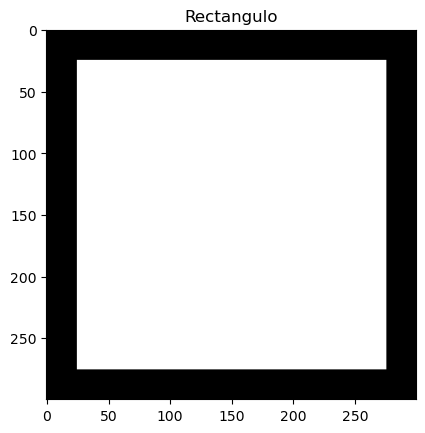

In [3]:
# Rectangulo 

rectangle = np.zeros((300, 300), dtype="uint8")
cv.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
plt_imshow("Rectangulo", rectangle)



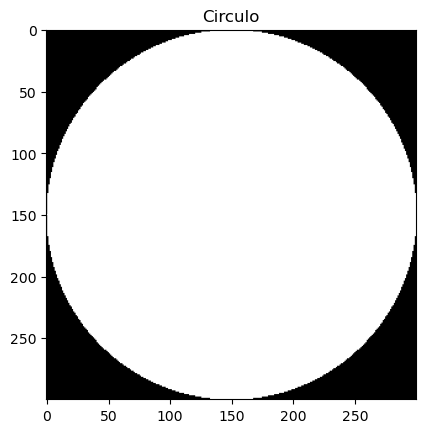

In [8]:
# Circulo

circle = np.zeros((300, 300), dtype = "uint8")
cv.circle(circle, (150, 150), 150, 255, -1)
plt_imshow("Circulo", circle)


<div class="alert alert-info">
 <ul>
  <li>Aplicar operaciones de AND, OR y XOR y NOT</li>
</ul> 


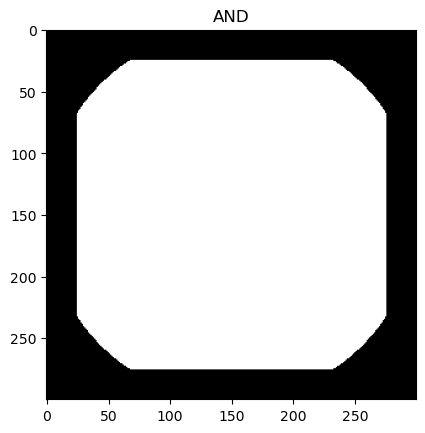

In [9]:
#AND
img_and = cv.bitwise_and(rectangle, circle)
plt_imshow("AND", img_and)

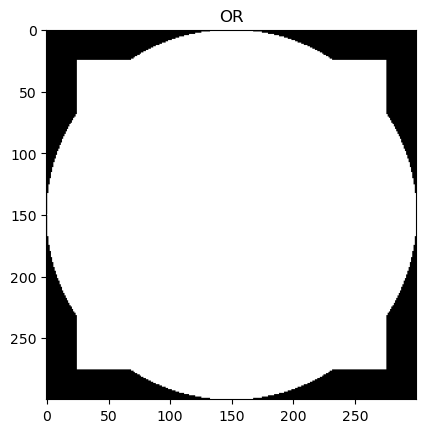

In [11]:
#OR
img_or = cv.bitwise_or(rectangle, circle)
plt_imshow("OR", img_or)

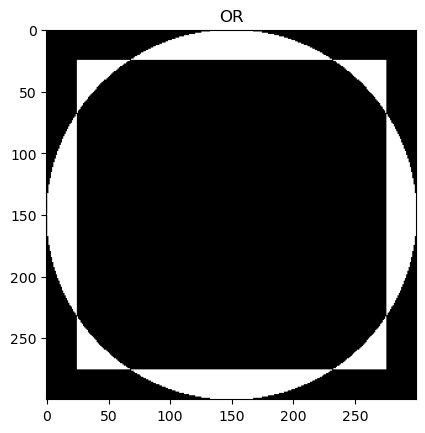

In [13]:
#XOR
img_xor = cv.bitwise_xor(rectangle, circle)
plt_imshow("OR", img_xor)

<div class="alert alert-info">
 <ul>
  <li>Aplicar la operacón inversa a ambas imagenes</li>
</ul> 

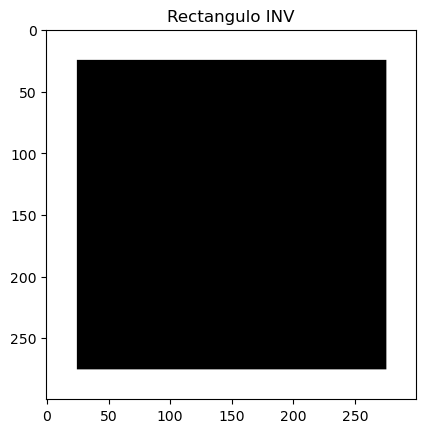

In [15]:
#Rectangulo
rectangle_inv = cv.bitwise_not(rectangle)
plt_imshow("Rectangulo INV", rectangle_inv)

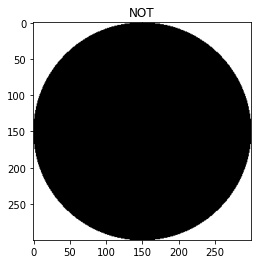

In [19]:
#Circulo


# 2. Máscaras

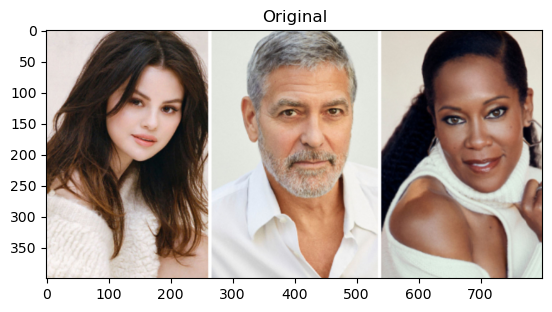

(400, 800, 3)

In [24]:
# Abrir el archivo 'figuras/people.jpg'
img_cara=cv.imread('figuras/people.jpg')
plt_imshow("Original",img_cara)
img_cara.shape

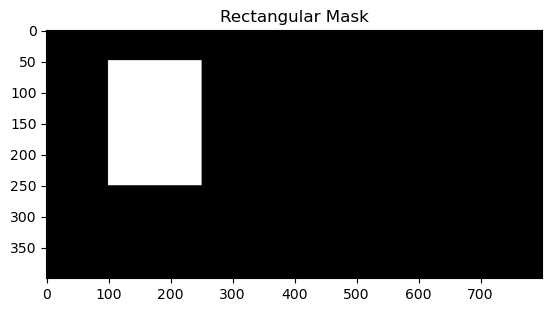

In [31]:
# Mascara rectangular
rectangle_masc=np.zeros((img_cara.shape[:2]), dtype="uint8")
cv.rectangle(rectangle_masc, (100, 50), (250, 250), 255, -1)
plt_imshow("Rectangular Mask", rectangle_masc)

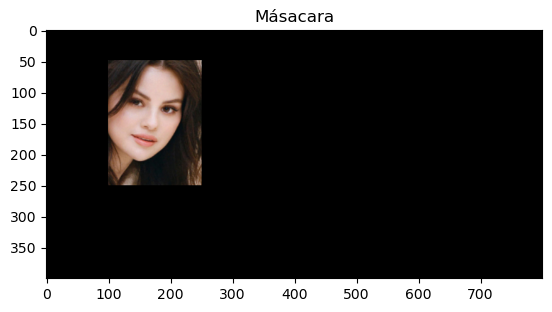

In [32]:
#Aplicar la mascara rectangular

img_mascara_rectangular = cv.bitwise_and(img_cara, img_cara, mask= rectangle_masc)

plt_imshow("Másacara", img_mascara_rectangular)

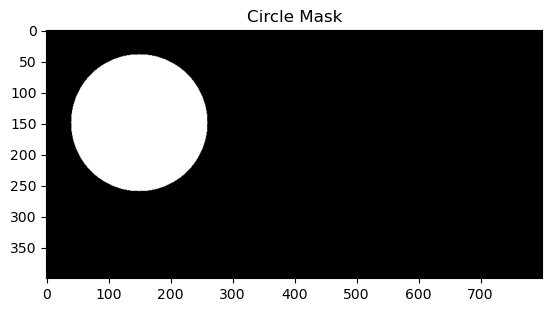

In [38]:
# Mascara circular y su implementación
masc_circle=np.zeros((img_cara.shape[:2]), dtype="uint8")
cv.circle(masc_circle, (150, 150), 110, 255, -1)
plt_imshow("Circle Mask", masc_circle)

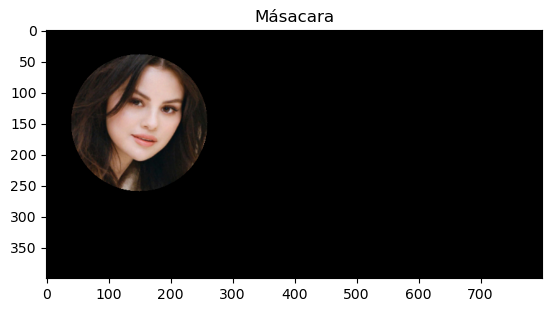

In [40]:
#Aplicar la mascara rectangular

img_mascara_circular = cv.bitwise_and(img_cara, img_cara, mask=masc_circle )

plt_imshow("Másacara", img_mascara_circular)

# 3. Operaciones morfológicas 

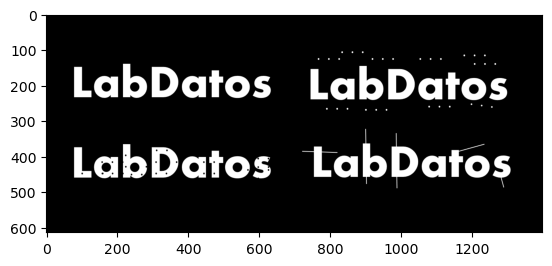

(613, 1398)

In [10]:
# Imagen figuras/labdatos.png en escala de grises
img=cv.imread('figuras/labdatos.png')
img_word_gray = cv.cvtColor( img, cv.COLOR_BGR2GRAY)
plt.imshow(img_word_gray, cmap='gray')
plt.show()
img_word_gray.shape

### Erosión

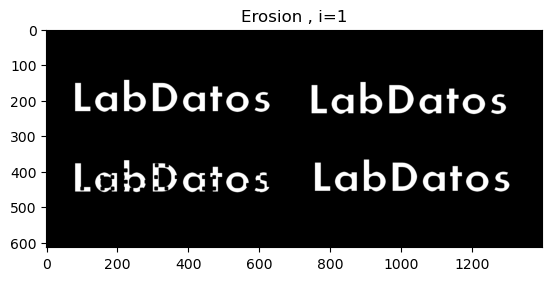

In [12]:
#Erosión
erosion = cv.erode(  img_word_gray.copy(), None, iterations = 3  )
plt_imshow('Erosion , i=1', erosion)

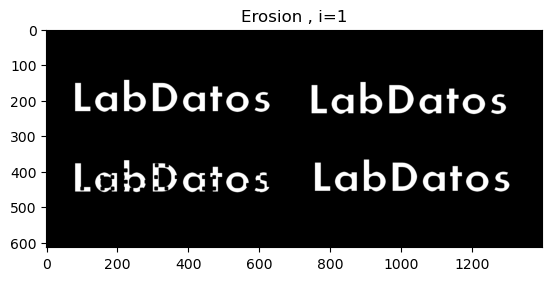

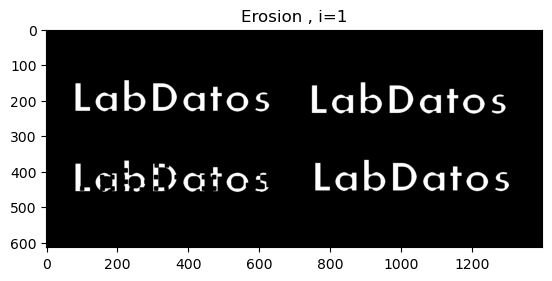

In [14]:
# Varias erosiones
erosion = cv.erode(  img_word_gray.copy(), None, iterations = 3)
plt_imshow('Erosion , i=1', erosion)

erosion = cv.erode(  img_word_gray.copy(), None, iterations = 4)
plt_imshow('Erosion , i=1', erosion)

### Dilatación

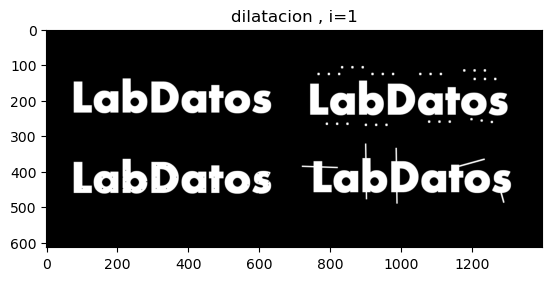

In [16]:
#Dilatación
dilatacion = cv.dilate(  img_word_gray.copy(), None, iterations = 1  )
plt_imshow('dilatacion , i=1', dilatacion)

In [17]:
#La dilatación varias veces


# Opening

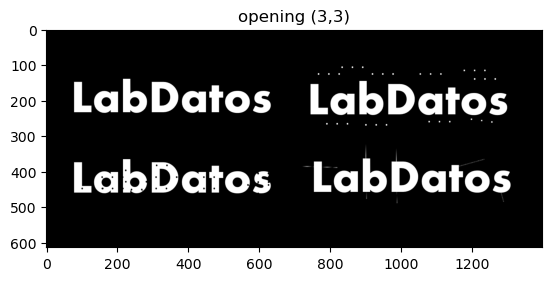

In [18]:
#Opening

kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
opening = cv.morphologyEx( img_word_gray.copy(), cv.MORPH_OPEN, kernel)
plt_imshow('opening (3,3)',opening)

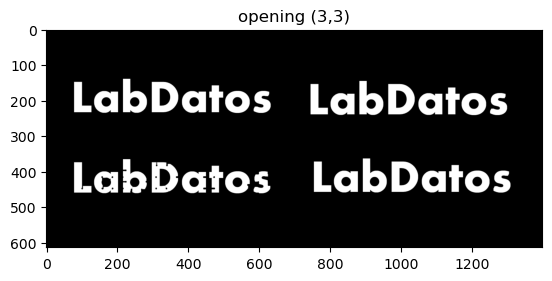

## Closing

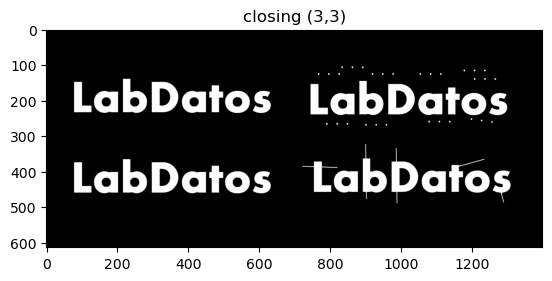

In [24]:
#Closing
kernel = cv.getStructuringElement(cv.MORPH_RECT, (7,7))
closing = cv.morphologyEx( img_word_gray.copy(), cv.MORPH_CLOSE, kernel)
plt_imshow('closing (3,3)',closing)

# Máscara para un rango de color

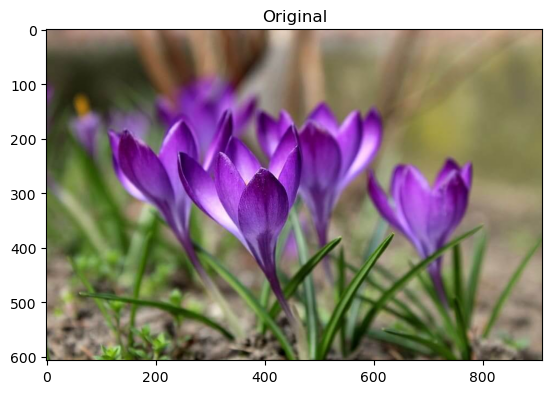

In [42]:
#Mostramos la imagen original
img_flor=cv.imread('figuras/flor_morada.jpg')
plt_imshow("Original",img_flor)

In [46]:
#Llevamos a cabo el cambio de espacio de color y definimos los rangos 
img_hsv = cv.cvtColor(img_flor, cv.COLOR_BGR2HSV)
low = np.array([86,34,21])
high = np.array([164,255,255])

In [47]:
#Aplicamos la mascara de la region de color
masc_flor = cv.inRange(img_hsv,low,high)


In [48]:
# Revisamos los valores de los pixeles
masc_flor.shape

(607, 910)

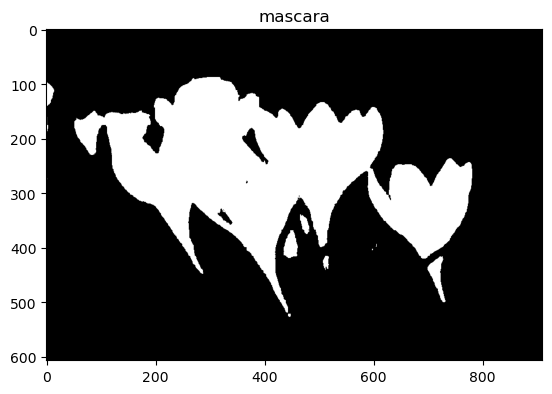

In [50]:
# Visualizamos la mascara
plt_imshow("mascara",masc_flor)

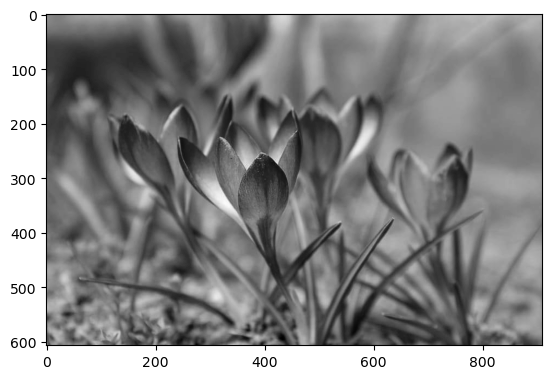

In [51]:
img_GRAY = cv.cvtColor( img_flor, cv.COLOR_BGR2GRAY)
plt.imshow(img_GRAY, cmap='gray')
plt.show()

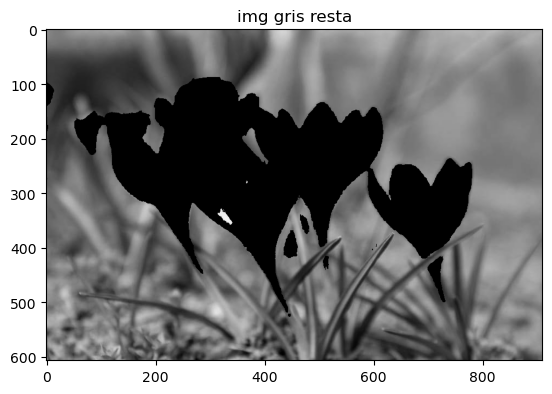

(607, 910)

In [53]:
#Obtenemos la imagen en escala de grisis y eliminamos los valores de la mascara
img_GRAY = cv.cvtColor( img_flor, cv.COLOR_BGR2GRAY)
img_GRAY_resta=cv.subtract( img_GRAY, masc_flor)
plt_imshow('img gris resta', img_GRAY_resta )
img_GRAY.shape

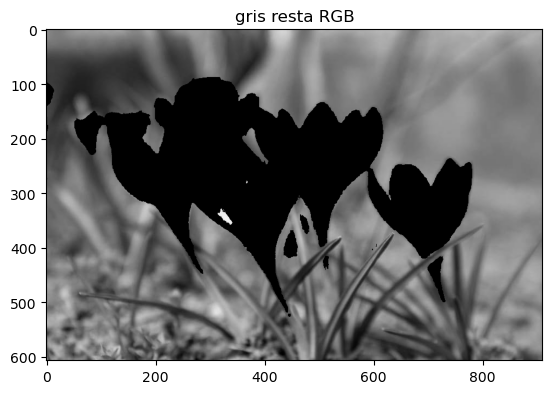

(607, 910, 3)

In [54]:
#COnvertimos la imagen resultante en RGB
img_GRAY_resta_rgb=cv.cvtColor(img_GRAY_resta,
                               cv.COLOR_GRAY2RGB)
plt_imshow('gris resta RGB', img_GRAY_resta_rgb )
img_GRAY_resta_rgb.shape

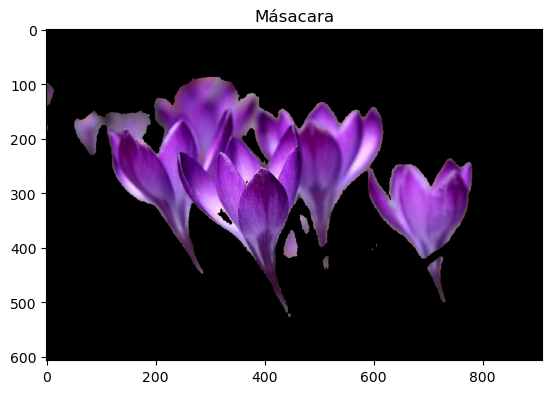

In [55]:
#Obtenemos la mascara aplicada a la imagen real
img_ = cv.bitwise_and(img_flor, img_flor, mask=masc_flor )
plt_imshow("Másacara", img_)

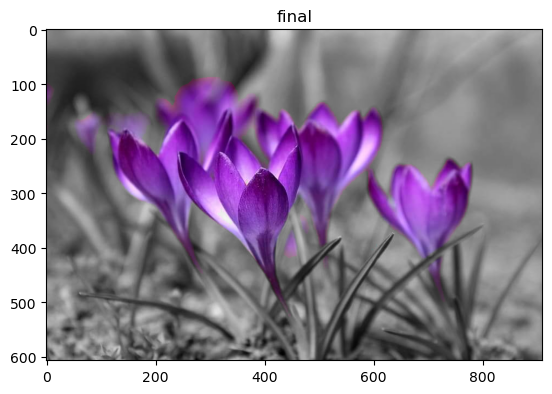

In [57]:
#Resaltando un color en una imagen  
img_final = cv.add(img_GRAY_resta_rgb, img_)
plt_imshow("final",img_final)